In [1]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, Dense, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1,L2,l1_l2
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import tensorflow as tf

In [2]:
seed = 909

## Data imports

In [3]:
image_datagen = ImageDataGenerator(rescale = 1/255)
mask_datagen = ImageDataGenerator(rescale = 1/255)

train_imagegen = image_datagen.flow_from_directory('scan+mask/train/scan', target_size=(512, 512), 
                                  color_mode='grayscale', class_mode=None,
                                  batch_size=16, seed=seed, shuffle=False)
train_maskgen = mask_datagen.flow_from_directory('scan+mask/train/mask', target_size=(512, 512), 
                                  color_mode='grayscale', class_mode=None,
                                  batch_size=16, seed=seed, shuffle=False)
val_imagegen = image_datagen.flow_from_directory('scan+mask/val/scan', target_size=(512, 512), 
                                  color_mode='grayscale', class_mode=None,
                                  batch_size=16, seed=seed, shuffle=False)
val_maskgen = mask_datagen.flow_from_directory('scan+mask/val/mask', target_size=(512, 512), 
                                  color_mode='grayscale', class_mode=None,
                                  batch_size=16, seed=seed, shuffle=False)
test_imagegen = image_datagen.flow_from_directory('scan+mask/test/scan', target_size=(512, 512), 
                                  color_mode='grayscale', class_mode=None,
                                  batch_size=16, seed=seed, shuffle=False)
test_maskgen = mask_datagen.flow_from_directory('scan+mask/test/mask', target_size=(512, 512), 
                                  color_mode='grayscale', class_mode=None,
                                  batch_size=16, seed=seed, shuffle=False)

Found 1838 images belonging to 1 classes.
Found 1838 images belonging to 1 classes.
Found 613 images belonging to 1 classes.
Found 613 images belonging to 1 classes.
Found 613 images belonging to 1 classes.
Found 613 images belonging to 1 classes.


## Quick look

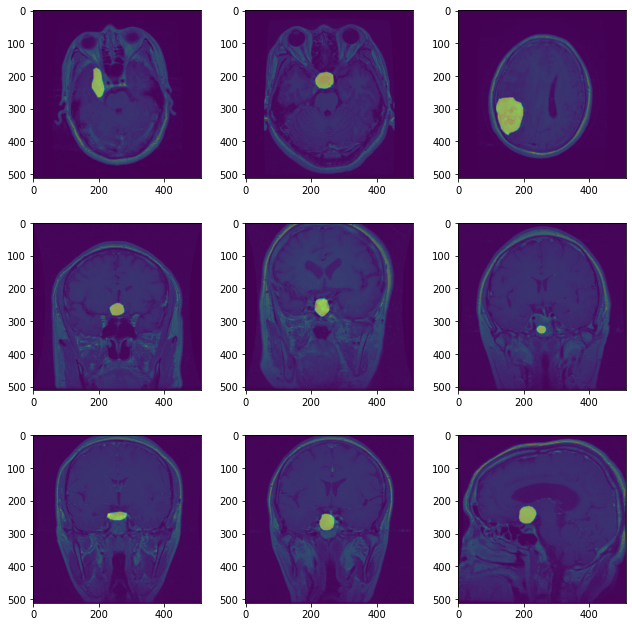

In [7]:
f,ax = plt.subplots(3,3, figsize=(9,9))
plt.tight_layout()
for i,axs in enumerate(ax.ravel()):
    axs.imshow(train_imagegen[i][1], alpha=1)
    axs.imshow(train_maskgen[i][1], alpha=0.5)

plt.show()

## Losses

In [8]:
from keras import backend as K
def recall_loss(y_true, y_pred):
    smooth=1
    pixels = 512 * 512
    
    
    one_w = 1.0 -(K.sum(K.batch_flatten(y_true), axis=1)/pixels)
    zero_w = 1.0 -((pixels-K.sum(K.batch_flatten(y_true), axis=1))/pixels)

    initial_loss = tf.losses.binary_crossentropy(y_true, y_pred)
    
    zero_loss = K.mean( K.batch_flatten(tf.squeeze(tf.cast(y_true == 0, tf.float32), axis = -1) * initial_loss), axis=1)
    one_loss = K.mean( K.batch_flatten(tf.squeeze(tf.cast(y_true == 1, tf.float32), axis = -1) * initial_loss), axis=1)
    
    zero_weighted_loss = (one_w * 100) * zero_loss
    one_weighted_loss = (zero_w * 100) * one_loss
    
    return K.mean(zero_weighted_loss) + K.mean(one_weighted_loss)

## Model

## Training

## Visualizing validation data

## Inference

### TSNE

### Other techniques

## Final loss, accuracy, thoughts